In [ ]:
#Name: Srinitish Srinivasan
#Reg No: 21BAI1394

In [10]:
import keras
from keras.datasets import mnist
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load dataset
(train_x,train_y),(test_x,test_y)=mnist.load_data()

#Preprocessing
train_x=(train_x.reshape((60000,28*28,))/255)
test_x=(test_x.reshape((10000,28*28,))/255)

In [3]:
#Convert to one hot
def convert_to_one_hot(label,depth=10):
    encoded=tf.one_hot(label,depth,axis=0)
    
    return encoded

In [4]:
train_y,test_y=np.array(convert_to_one_hot(train_y)),np.array(convert_to_one_hot(test_y))
train_y,test_y=np.transpose(train_y),np.transpose(test_y)

In [5]:
#Make Model
nn=tf.keras.Sequential()
nn.add(tf.keras.layers.Dense(units=512,activation='relu',input_shape=(28*28,)))
nn.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [8]:
#Compile and Fit
nn.compile(optimizer=tf.keras.optimizers.legacy.Adam(),loss=keras.losses.CategoricalCrossentropy(),metrics=keras.metrics.CategoricalAccuracy())

In [9]:
learning=nn.fit(train_x,train_y,epochs=25,batch_size=32,verbose=True)

Epoch 1/25
1875/1875 [==============================] - 2s 997us/step - loss: 0.2018 - categorical_accuracy: 0.9396
Epoch 2/25
1875/1875 [==============================] - 2s 852us/step - loss: 0.0797 - categorical_accuracy: 0.9752
Epoch 3/25
1875/1875 [==============================] - 2s 924us/step - loss: 0.0508 - categorical_accuracy: 0.9844
Epoch 4/25
1875/1875 [==============================] - 2s 856us/step - loss: 0.0377 - categorical_accuracy: 0.9881
Epoch 5/25
1875/1875 [==============================] - 2s 854us/step - loss: 0.0259 - categorical_accuracy: 0.9915
Epoch 6/25
1875/1875 [==============================] - 2s 857us/step - loss: 0.0221 - categorical_accuracy: 0.9927
Epoch 7/25
1875/1875 [==============================] - 2s 900us/step - loss: 0.0162 - categorical_accuracy: 0.9947
Epoch 8/25
1875/1875 [==============================] - 2s 858us/step - loss: 0.0143 - categorical_accuracy: 0.9955
Epoch 9/25
1875/1875 [==============================] - 2s 850us/step - 

Text(0.5, 1.0, 'Loss vs Epoch')

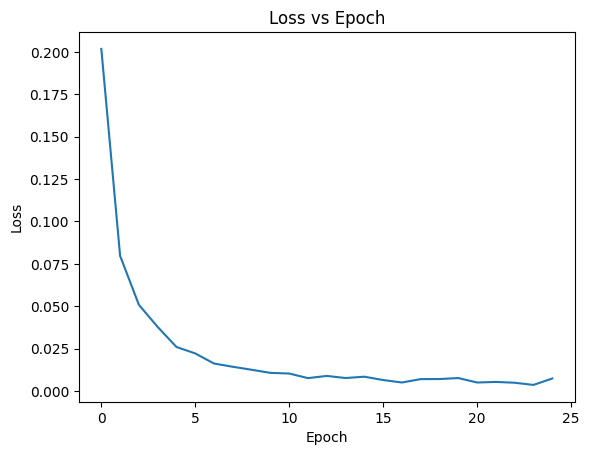

In [11]:
plt.plot(learning.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch")


Text(0.5, 1.0, 'Accuracy vs epoch')

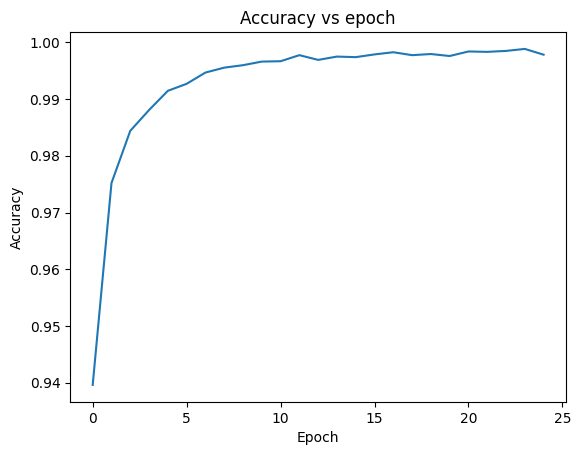

In [14]:
plt.plot(learning.history['categorical_accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs epoch")